In [129]:
import numpy as np  ###  import the libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [130]:
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [131]:
df=pd.read_csv("form_41e-price-new-house-area-by_year_1.csv")  ###
df.head(5)
##  This layout is not acceptable

YEAR Average New House Price Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0     NaN                National     Dublin       Cork     Galway   Limerick   
1  1997.0                 102,037    123,231     96,504    111,108     91,236   
2  1998.0                 124,368    159,558    112,166    118,917    104,327   
3  1999.0                 147,043    191,942    140,797    137,510    122,146   
4  2000.0                 166,155    216,433    164,535    160,972    146,838   

  Unnamed: 6   Unnamed: 7  
0  Waterford  Other Areas  
1     92,372       94,642  
2    108,789      116,639  
3    132,510      137,031  
4    145,087      154,141

In [132]:
##  We need to delete header row and rename features appropriately
df = pd.read_csv('form_41e-price-new-house-area-by_year_1.csv', skiprows=[0])

In [133]:
df.head()

Unnamed: 0 National   Dublin     Cork   Galway Limerick Waterford  \
0        1997  102,037  123,231   96,504  111,108   91,236    92,372   
1        1998  124,368  159,558  112,166  118,917  104,327   108,789   
2        1999  147,043  191,942  140,797  137,510  122,146   132,510   
3        2000  166,155  216,433  164,535  160,972  146,838   145,087   
4        2001  181,146  252,192  175,372  171,578  154,515   157,767   

  Other Areas  
0      94,642  
1     116,639  
2     137,031  
3     154,141  
4     167,493

In [135]:
#  Rename Unnamed to something else
#  Never use spaces in column names as python hates spaces
df.rename(columns = {'Unnamed: 0':'Year', 'Other Areas': 'Other_Areas'}, inplace = True)
df.head(5)

Year National   Dublin     Cork   Galway Limerick Waterford Other_Areas
0  1997  102,037  123,231   96,504  111,108   91,236    92,372      94,642
1  1998  124,368  159,558  112,166  118,917  104,327   108,789     116,639
2  1999  147,043  191,942  140,797  137,510  122,146   132,510     137,031
3  2000  166,155  216,433  164,535  160,972  146,838   145,087     154,141
4  2001  181,146  252,192  175,372  171,578  154,515   157,767     167,493

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         19 non-null     int64 
 1   National     19 non-null     object
 2   Dublin       19 non-null     object
 3   Cork         19 non-null     object
 4   Galway       19 non-null     object
 5   Limerick     19 non-null     object
 6   Waterford    19 non-null     object
 7   Other_Areas  19 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.3+ KB


In [137]:
df['National']=df['National'].str.replace(',','')
df['Dublin']=df['Dublin'].str.replace(',','')
df['Cork']=df['Cork'].str.replace(',','')
df['Galway']=df['Galway'].str.replace(',','')
df['Limerick']=df['Limerick'].str.replace(',','')
df['Waterford']=df['Waterford'].str.replace(',','')
df['Other_Areas']=df['Other_Areas'].str.replace(',','')

df.head(5)

Year National  Dublin    Cork  Galway Limerick Waterford Other_Areas
0  1997   102037  123231   96504  111108    91236     92372       94642
1  1998   124368  159558  112166  118917   104327    108789      116639
2  1999   147043  191942  140797  137510   122146    132510      137031
3  2000   166155  216433  164535  160972   146838    145087      154141
4  2001   181146  252192  175372  171578   154515    157767      167493

In [149]:
#  Convert to numbers, categories etc
df['National'] = df['National'].apply(pd.to_numeric, errors='coerce')
df['Dublin'] = df['Dublin'].apply(pd.to_numeric, errors='coerce')
df['Cork'] = df['Cork'].apply(pd.to_numeric, errors='coerce')
df['Galway'] = df['Galway'].apply(pd.to_numeric, errors='coerce')
df.Year = df.Year.astype("int") ### Or use datetime? Its your choice
#df["blank_column"] = df["Top 4"].astype('bool') if you wanted a boolean value?
df['Limerick'] = df['Limerick'].apply(pd.to_numeric, errors='coerce')
df['Waterford'] = df['Waterford'].apply(pd.to_numeric, errors='coerce')
df['Other_Areas'] = df['Other_Areas'].apply(pd.to_numeric, errors='coerce')

In [150]:
df.tail(5)

Year  National  Dublin    Cork  Galway  Limerick  Waterford  Other_Areas
14  2011    233770  333747  244736  229558    218341     206835       218561
15  2012    223580  292004  235446  221159    213458     179716       210180
16  2013    231532  321558  241127  218308    207635     154051       209772
17  2014    247327  339590  242202  219725    212882     177963       215439
18  2015    282428  381484  256767  241835    232791     214829       252815

In [151]:
#  
df.dtypes  ##  just what we want 

Year           int32
National       int64
Dublin         int64
Cork           int64
Galway         int64
Limerick       int64
Waterford      int64
Other_Areas    int64
dtype: object

In [152]:
df.shape

(19, 8)

In [153]:
df.isnull().sum()  ## Re check for null values.

Year           0
National       0
Dublin         0
Cork           0
Galway         0
Limerick       0
Waterford      0
Other_Areas    0
dtype: int64

In [154]:
df.describe()  ### use df.describe(include = "all") if you wish?  I found it redundant.

Year       National         Dublin           Cork  \
count    19.000000      19.000000      19.000000      19.000000   
mean   2006.000000  224957.631579  309492.157895  223630.263158   
std       5.627314   60311.751099   97607.446502   63859.395197   
min    1997.000000  102037.000000  123231.000000   96504.000000   
25%    2001.500000  187990.500000  255786.500000  180128.000000   
50%    2006.000000  233173.000000  302270.000000  241127.000000   
75%    2010.500000  259680.500000  362367.500000  256372.500000   
max    2015.000000  320788.000000  484926.000000  326765.000000   

              Galway       Limerick      Waterford    Other_Areas  
count      19.000000      19.000000      19.000000      19.000000  
mean   215932.210526  202387.631579  195253.789474  208699.947368  
std     56306.804905   58336.558668   57672.653196   56225.710590  
min    111108.000000   91236.000000   92372.000000   94642.000000  
25%    179386.000000  162046.000000  155909.000000  173740.500000  
50%    221159.000000  212882.000000  193642.000000  215439.000000  
75%    241690.000000  229810.000000  226176.500000  243755.500000  
max    302208.000000  290670.000000  295397.000000  299884.000000

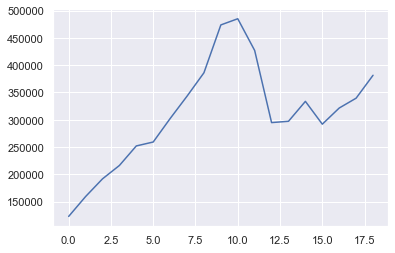

In [155]:
df["Dublin"].plot(); ##  Graph 

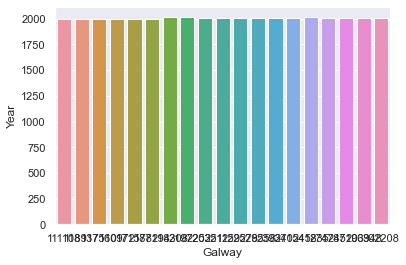

In [157]:
sns.barplot(y = 'Year',
            x = 'Galway',
            data = df)
 
# Show the plot
plt.show()

In [158]:
####  Some more graphs
# Scatter for correlations,  boxplots for max-min, outliers etc, histograms for 'spread' of values 

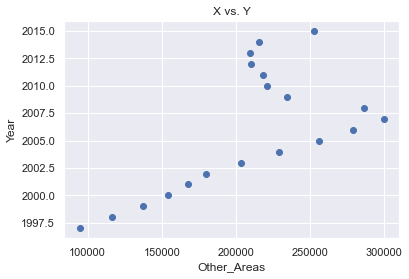

In [159]:
plt.scatter(df.Other_Areas, df.Year)
plt.title('X vs. Y')
plt.xlabel('Other_Areas')
plt.ylabel('Year')
plt.show();

<AxesSubplot:>

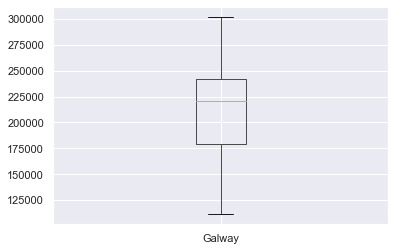

In [160]:
df.boxplot(column=['Galway'])

<AxesSubplot:>

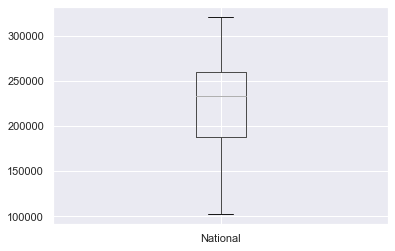

In [161]:
df.boxplot(column=['National'])

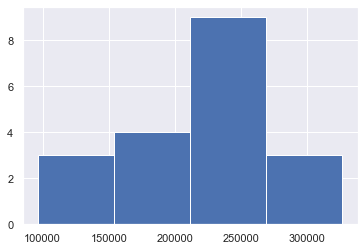

In [162]:
plt.hist(df['Cork'],bins=4);

In [163]:
df.skew()

Year           0.000000
National      -0.443989
Dublin        -0.016329
Cork          -0.455020
Galway        -0.360398
Limerick      -0.382840
Waterford      0.118142
Other_Areas   -0.385571
dtype: float64

### https://github.com/Ashwin-narayana/Diabetes-prediction/blob/main/diabetes_prediction_Logisticregression.ipynb

In [108]:
#!pip install missingno
import numpy as np
import pandas as pd
import missingno as msno 
#import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [109]:
### Alternate logistic regression
dataset=pd.read_csv("diabetes.csv")
df=dataset.copy()

In [110]:
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [111]:
df.shape


(768, 9)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


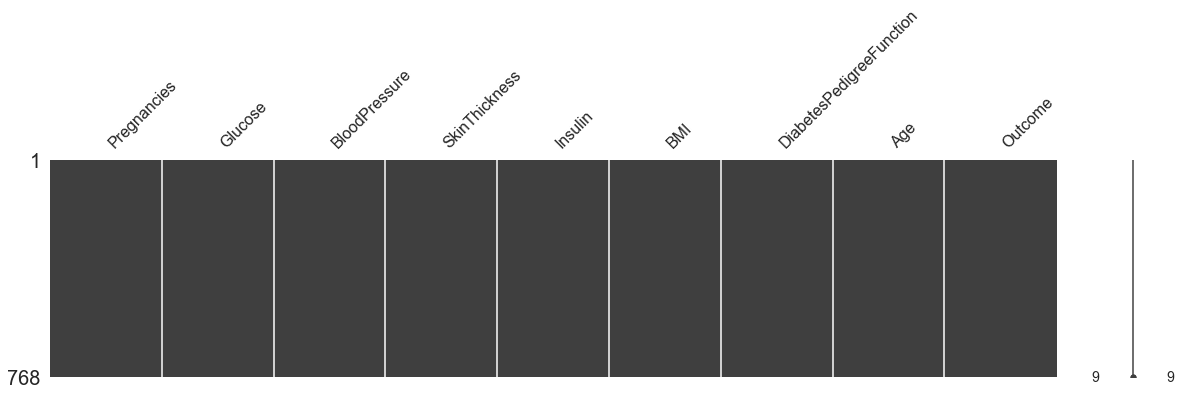

In [113]:
missing_values=msno.matrix(df,figsize=(20,4))

In [114]:
#missing_values=msno.matrix(df,figsize=(20,4))
df.describe().transpose()

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [115]:
df.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

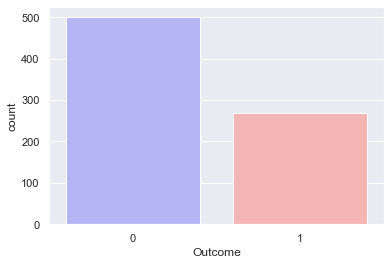

In [116]:
f = sns.countplot(x="Outcome", data=df, palette="bwr")
plt.show()

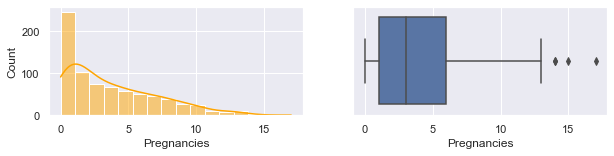

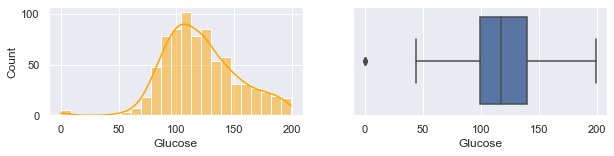

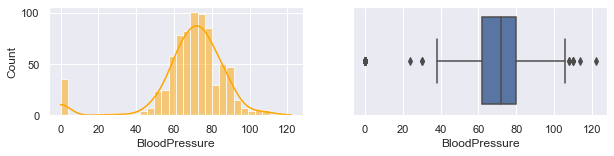

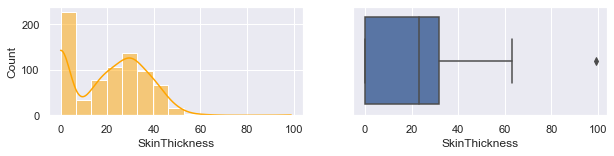

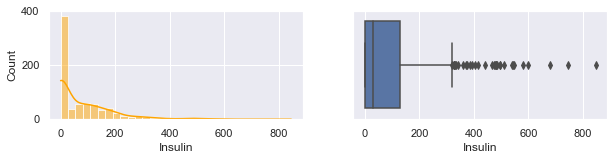

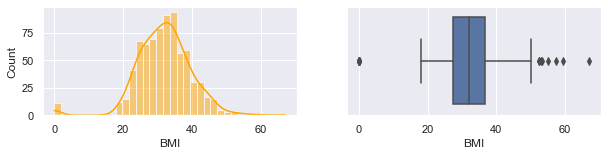

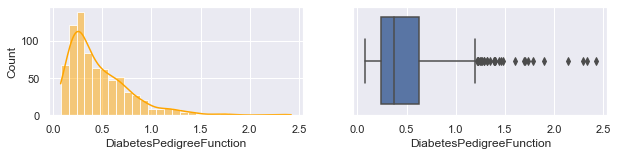

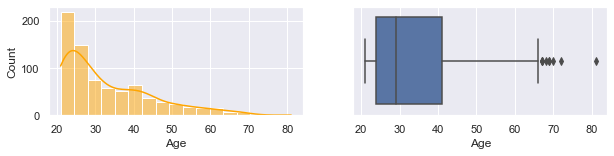

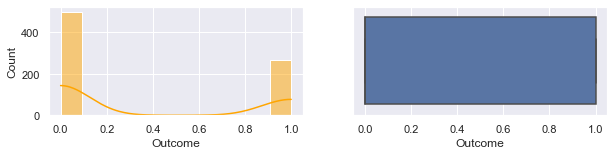

In [117]:
for i in df.columns:
    fig,ax = plt.subplots(1,2, figsize=(10,2))
    sns.histplot(data=df, x=i, ax=ax[0],kde = True, color="orange")
    sns.boxplot(data=df, x=i, ax=ax[1])

In [118]:
def median(var):
    df[var]=df[var].replace(0,np.nan)
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [119]:
median("Glucose")

Outcome  Glucose
0        0    107.0
1        1    140.0

In [120]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

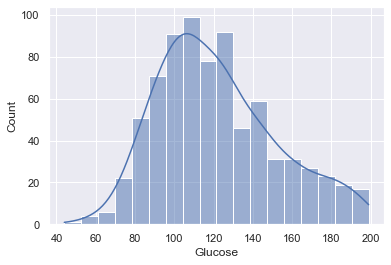

In [121]:
sns.histplot(data=df, x=df["Glucose"],kde=True)

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

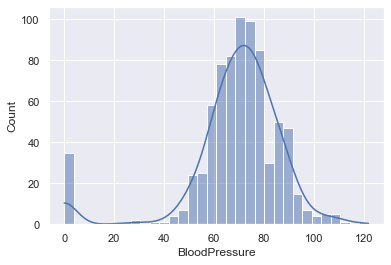

In [122]:
sns.histplot(data=df, x=df["BloodPressure"],kde=True)

In [123]:
median("BloodPressure")

Outcome  BloodPressure
0        0           70.0
1        1           74.5

In [124]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

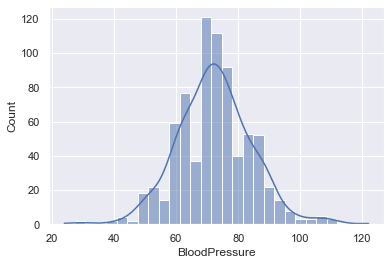

In [125]:
sns.histplot(data=df,x=df["BloodPressure"],kde=True)

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

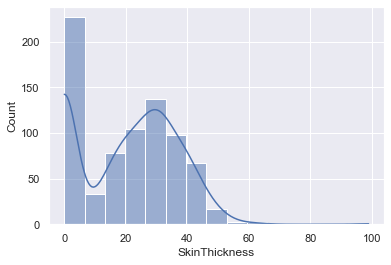

In [126]:
sns.histplot(data=df,x=df["SkinThickness"],kde=True)

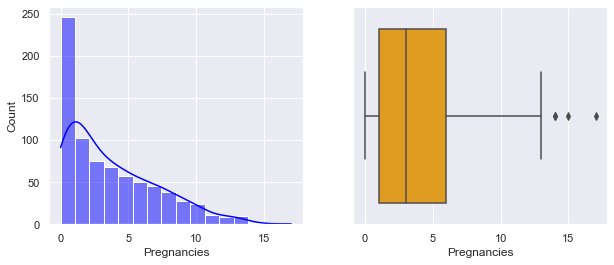

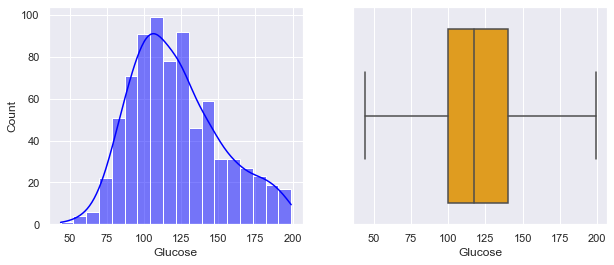

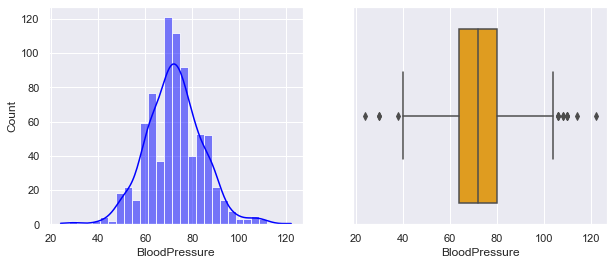

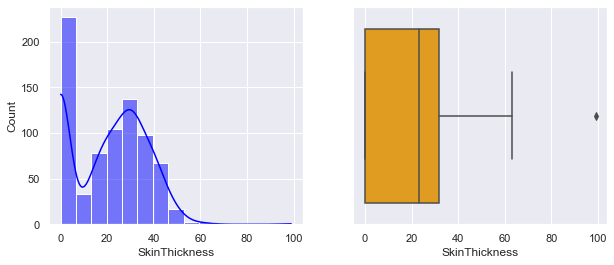

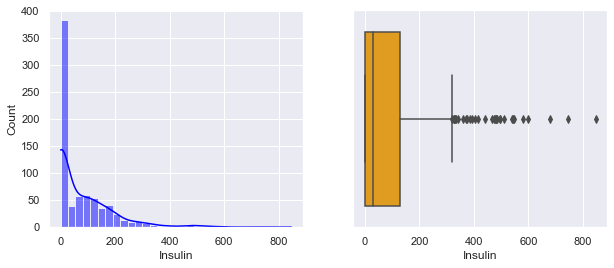

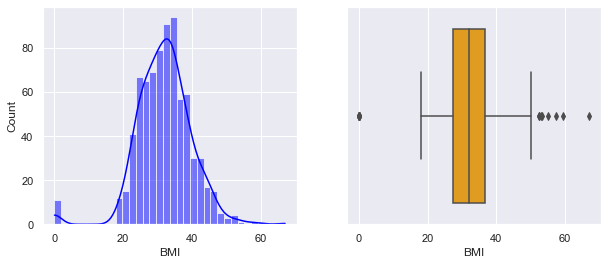

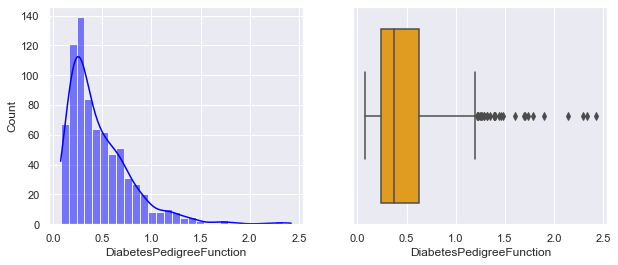

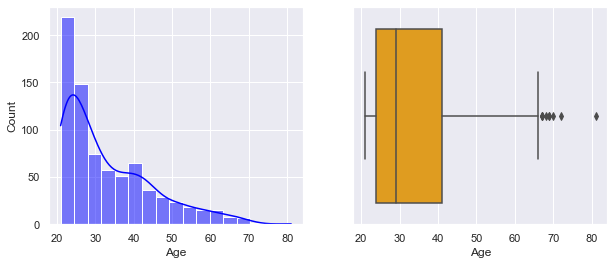

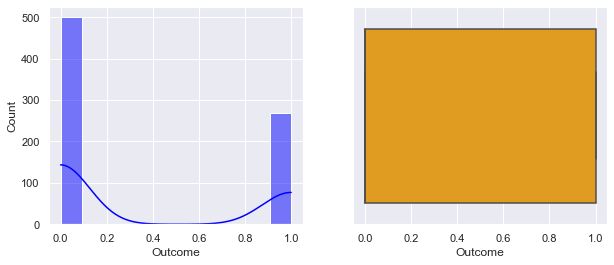

In [127]:
for i in df.columns:
    fig,ax=plt.subplots(1,2, figsize=(10,4))
    sns.histplot(data=df, x=i, ax=ax[0],kde = True,color="Blue")
    sns.boxplot(data=df, x=i, ax=ax[1],color="orange")

<AxesSubplot:>

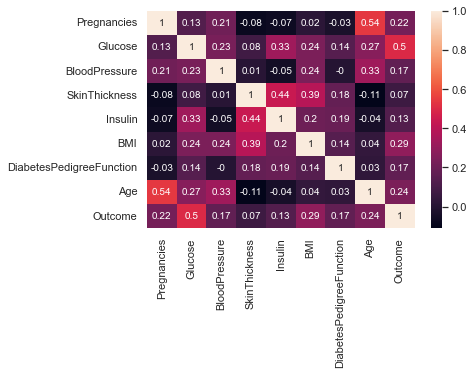

In [128]:
heatmap1=df.corr().round(2)
sns.heatmap(heatmap1,annot=True)

In [ ]:
###  As you can see I included a 'link' to code that performs a logistic regressio, as Dr Iqbal covered simple regression and multiple regression in class.  